<a href="https://colab.research.google.com/github/beyzoskaya/ML-In-Finance-CS-540/blob/main/finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer

def prepare_datasets(tokenizer, dataset_name="financial_phrasebank", subset_name="sentences_50agree", max_length=128, random_state=42):
    dataset = load_dataset(dataset_name, subset_name, trust_remote_code=True)

    df = pd.DataFrame(dataset['train'])

    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df['sentence'], df['label'], test_size=0.2, stratify=df['label'], random_state=random_state
    )
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        train_texts, train_labels, test_size=0.1, stratify=train_labels, random_state=random_state
    )

    train_df = pd.DataFrame({'sentence': train_texts, 'label': train_labels})
    val_df = pd.DataFrame({'sentence': val_texts, 'label': val_labels})
    test_df = pd.DataFrame({'sentence': test_texts, 'label': test_labels})

    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    test_dataset = Dataset.from_pandas(test_df)

    def tokenize_function(example):
        return tokenizer(
            example["sentence"],
            padding="max_length",
            truncation=True,
            max_length=max_length
        )

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)
    test_dataset = test_dataset.map(tokenize_function, batched=True)

    return train_dataset, val_dataset, test_dataset

In [3]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
train_dataset, val_dataset, test_dataset = prepare_datasets(tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3488 [00:00<?, ? examples/s]

Map:   0%|          | 0/388 [00:00<?, ? examples/s]

Map:   0%|          | 0/970 [00:00<?, ? examples/s]

In [4]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 3488
Validation dataset size: 388
Test dataset size: 970


In [5]:
print(train_dataset[0])

{'sentence': 'The deliveries are scheduled for the summer and autumn of 2008 .', 'label': 1, '__index_level_0__': 2624, 'input_ids': [101, 1996, 23534, 2024, 5115, 2005, 1996, 2621, 1998, 7114, 1997, 2263, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1,

<ipython-input-6-585c961256e7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', palette="viridis", ax=axes[0])
<ipython-input-6-585c961256e7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=val_df, x='label', palette="viridis", ax=axes[1])
<ipython-input-6-585c961256e7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='label', palette="viridis", ax=axes[2])


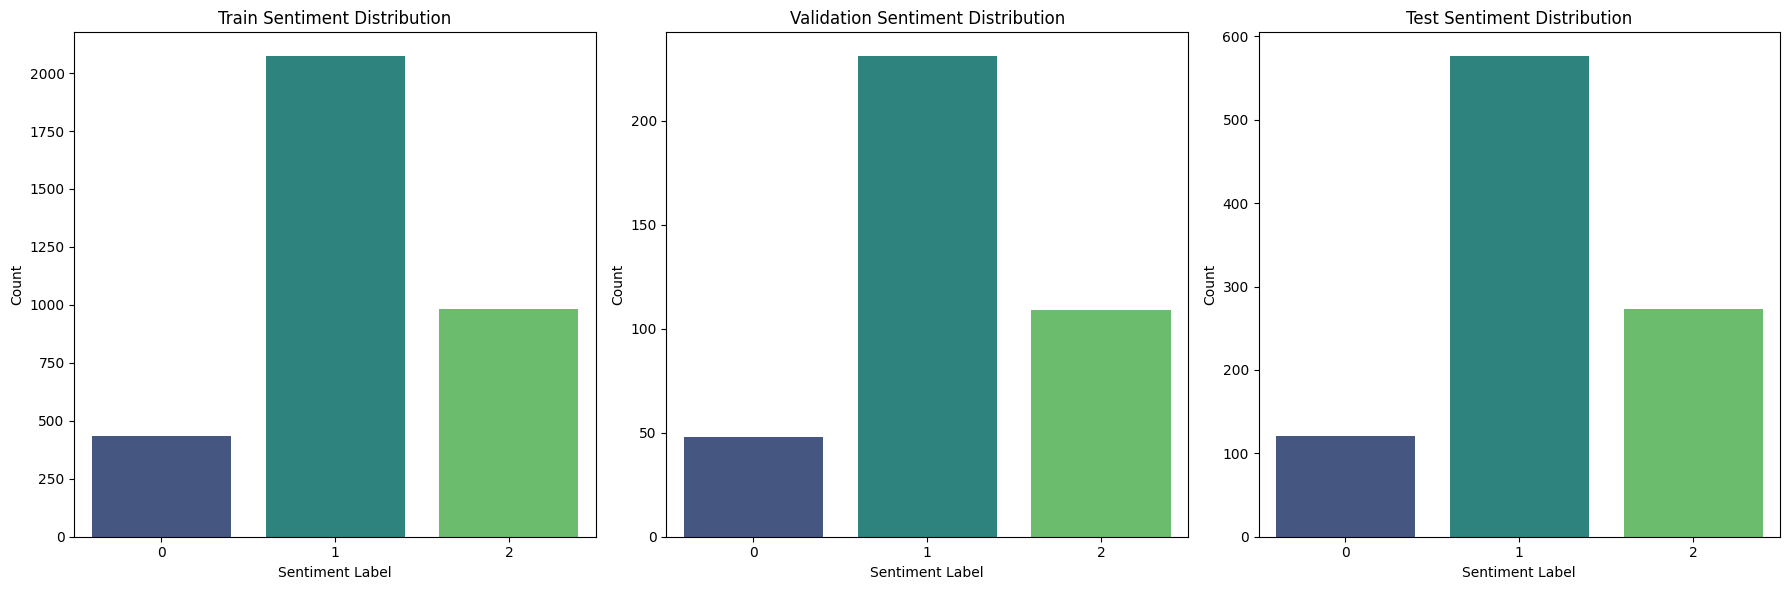

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert train, validation, and test datasets to pandas DataFrames
train_df = train_dataset.to_pandas()
val_df = val_dataset.to_pandas()
test_df = test_dataset.to_pandas()

# Plot sentiment label distribution across the datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=train_df, x='label', palette="viridis", ax=axes[0])
axes[0].set_title('Train Sentiment Distribution')
axes[0].set_xlabel('Sentiment Label')
axes[0].set_ylabel('Count')

sns.countplot(data=val_df, x='label', palette="viridis", ax=axes[1])
axes[1].set_title('Validation Sentiment Distribution')
axes[1].set_xlabel('Sentiment Label')
axes[1].set_ylabel('Count')

sns.countplot(data=test_df, x='label', palette="viridis", ax=axes[2])
axes[2].set_title('Test Sentiment Distribution')
axes[2].set_xlabel('Sentiment Label')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

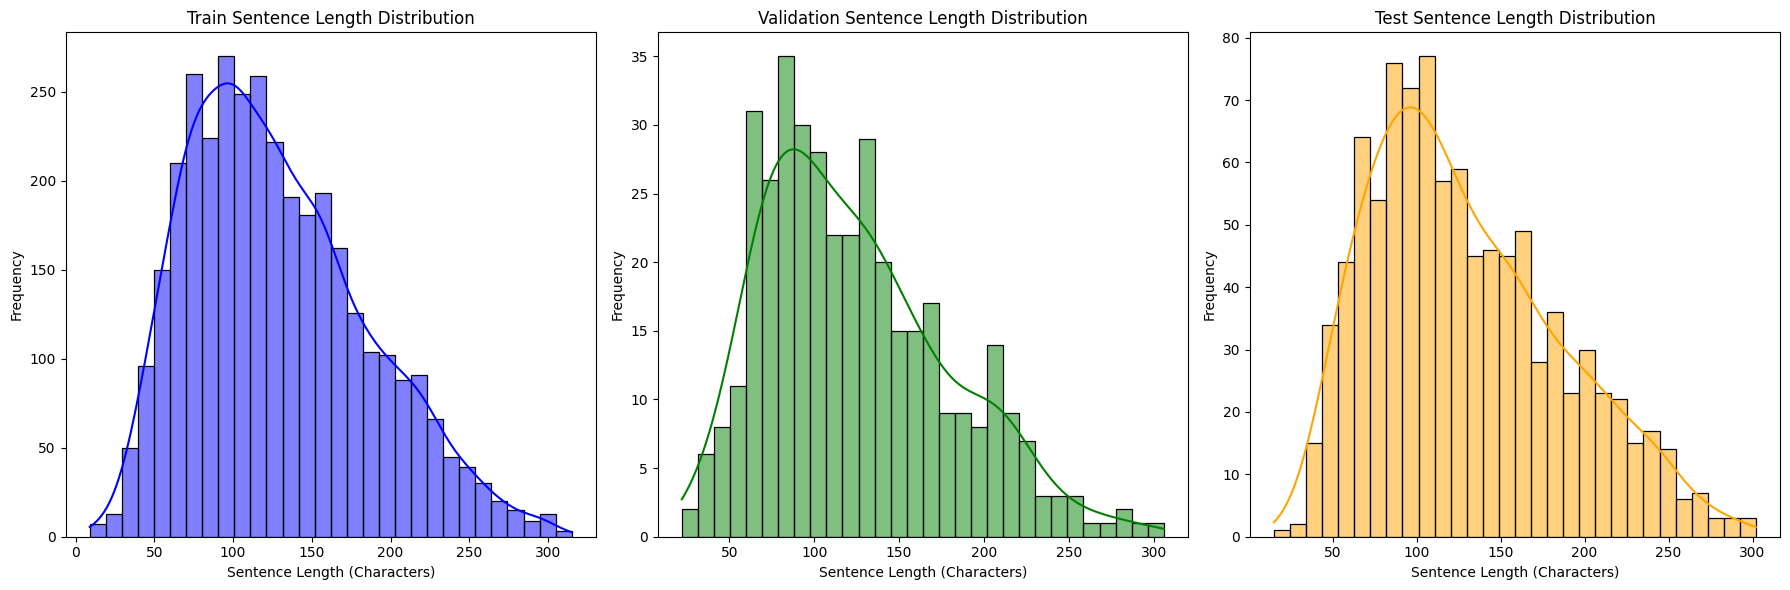

In [7]:
train_df['sentence_length'] = train_df['sentence'].apply(len)
val_df['sentence_length'] = val_df['sentence'].apply(len)
test_df['sentence_length'] = test_df['sentence'].apply(len)

# Plot sentence length distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(train_df['sentence_length'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Train Sentence Length Distribution')
axes[0].set_xlabel('Sentence Length (Characters)')
axes[0].set_ylabel('Frequency')

sns.histplot(val_df['sentence_length'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Validation Sentence Length Distribution')
axes[1].set_xlabel('Sentence Length (Characters)')
axes[1].set_ylabel('Frequency')

sns.histplot(test_df['sentence_length'], bins=30, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Test Sentence Length Distribution')
axes[2].set_xlabel('Sentence Length (Characters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

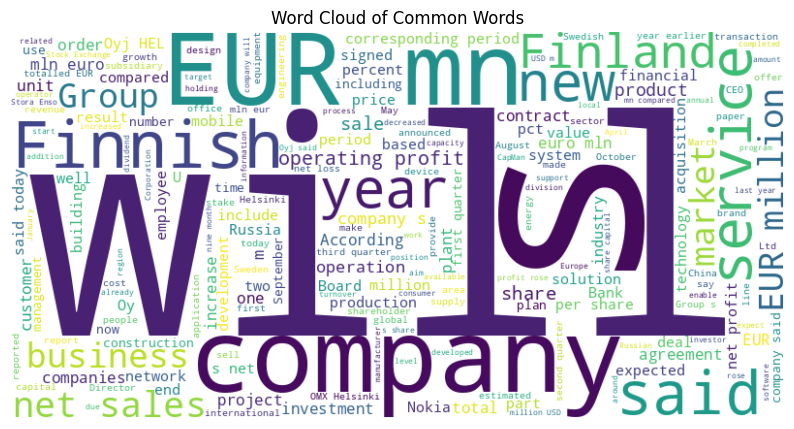

In [8]:
from wordcloud import WordCloud

all_sentences = " ".join(train_df['sentence'].values) + " " + " ".join(val_df['sentence'].values) + " " + " ".join(test_df['sentence'].values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words')
plt.show()

In [18]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [19]:
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # positive, negative, neutral

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
model = model.to(device)

In [20]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(p):
    predictions, labels = p

    # Move predictions and labels to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert predictions and labels to PyTorch tensors (if they are numpy.ndarray)
    if isinstance(predictions, np.ndarray):
        predictions = torch.tensor(predictions)

    if isinstance(labels, np.ndarray):
        labels = torch.tensor(labels)

    # Move both tensors to the same device as the model
    predictions = predictions.to(device)
    labels = labels.to(device)

    # Get the predicted class labels (index of the highest logit)
    preds = torch.argmax(predictions, axis=1)

    # Calculate the metrics
    accuracy = accuracy_score(labels.cpu(), preds.cpu())  # Move back to CPU for sklearn metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels.cpu(), preds.cpu(), average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [21]:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [23]:
# Start training the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.435200,0.451088,0.824742,0.824200,0.824742,0.823990
2,0.442100,0.381271,0.863402,0.866331,0.863402,0.864233
3,0.211900,0.432768,0.840206,0.842237,0.840206,0.840993


TrainOutput(global_step=654, training_loss=0.47247365618335363, metrics={'train_runtime': 128.6225, 'train_samples_per_second': 81.354, 'train_steps_per_second': 5.085, 'total_flos': 688304700776448.0, 'train_loss': 0.47247365618335363, 'epoch': 3.0})

In [24]:
# Evaluate the model on the test dataset
results = trainer.evaluate(test_dataset)
print(f"Test results: {results}")

Test results: {'eval_loss': 0.43728089332580566, 'eval_accuracy': 0.831958762886598, 'eval_precision': 0.8416271503829533, 'eval_recall': 0.831958762886598, 'eval_f1': 0.8335699108375576, 'eval_runtime': 3.1491, 'eval_samples_per_second': 308.026, 'eval_steps_per_second': 19.371, 'epoch': 3.0}


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

sentence = "The market is bullish today."

inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)

inputs = {key: value.to(device) for key, value in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1)

print(f"Predicted class: {predicted_class.item()}")

Predicted class: 1


In [27]:
print(train_dataset['label'][:10])  # Print the first 10 labels
print(f"Unique labels in the training dataset: {set(train_dataset['label'])}")

[1, 2, 1, 2, 1, 1, 1, 1, 2, 1]
Unique labels in the training dataset: {0, 1, 2}


In [29]:
for i in range(10):  # Print the first 10 samples
    print(f"Sentence: {train_dataset[i]['sentence']} - Label: {train_dataset[i]['label']}")

Sentence: The deliveries are scheduled for the summer and autumn of 2008 . - Label: 1
Sentence: Both operating profit and net sales for the 12-month period increased , respectively from EUR4 .7 m and EUR26 .7 m , as compared to 2004 . - Label: 2
Sentence: The NTSB said investigators are set to conduct sight distance tests on July 18 , using trains similar to those involved in the accident . - Label: 1
Sentence: Ruukki 's delivery volumes and selling prices showed favourable development and the company 's comparable net sales grew by 50 % year-on-year to EUR647m , CEO Sakari Tamminen said . - Label: 2
Sentence: Aldata noted that its Voice Supply Chain Technology approach enables VDW to integrate with warehouse management systems . - Label: 1
Sentence: CapMan , an asset manager , has EUR 3bn worth of assets under management in the Nordic region . - Label: 1
Sentence: The machinery now ordered will be placed in a new mill with an annual production capacity of 40 000 m3 of overlaid birch p

### Model Ensemble for same dataset

In [30]:
from transformers import BertForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

# different models to train
models = [
    BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3),
    BertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3),
    BertForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
]

# tokinzers for each model
tokenizers = [
    AutoTokenizer.from_pretrained('bert-base-uncased'),
    AutoTokenizer.from_pretrained('distilbert-base-uncased'),
    AutoTokenizer.from_pretrained('roberta-base')
]

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerN

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight'

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [32]:
models = [model.to(device) for model in models]

In [33]:
for model, tokenizer in zip(models, tokenizers):
    print(f"Training model: {model.__class__.__name__}")

    train_dataset, val_dataset, _ = prepare_datasets(tokenizer)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()

Training model: BertForSequenceClassification


Map:   0%|          | 0/3488 [00:00<?, ? examples/s]

Map:   0%|          | 0/388 [00:00<?, ? examples/s]

Map:   0%|          | 0/970 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.383925,0.853093,0.852442,0.853093,0.852704
2,No log,0.429590,0.873711,0.877293,0.873711,0.874796
3,0.348600,0.615869,0.855670,0.856058,0.855670,0.855811


Training model: BertForSequenceClassification


Map:   0%|          | 0/3488 [00:00<?, ? examples/s]

Map:   0%|          | 0/388 [00:00<?, ? examples/s]

Map:   0%|          | 0/970 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.931343,0.595361,0.354455,0.595361,0.444357
2,No log,0.845900,0.652062,0.549948,0.652062,0.570223
3,0.905800,0.767916,0.664948,0.590535,0.664948,0.625031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training model: BertForSequenceClassification


Map:   0%|          | 0/3488 [00:00<?, ? examples/s]

Map:   0%|          | 0/388 [00:00<?, ? examples/s]

Map:   0%|          | 0/970 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.930953,0.595361,0.354455,0.595361,0.444357
2,No log,0.939345,0.587629,0.460644,0.587629,0.465344
3,0.921700,0.776802,0.659794,0.557216,0.659794,0.594788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import torch
import numpy as np

def ensemble_predict_averaging(models, tokenizers, sentence, device):
    inputs = [tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128) for tokenizer in tokenizers]

    inputs = [{key: value.to(device) for key, value in input_item.items()} for input_item in inputs]

    logits_list = []
    for model, input_item in zip(models, inputs):
        model.to(device)
        with torch.no_grad():
            outputs = model(**input_item)
            logits = outputs.logits
            logits_list.append(logits)

    avg_logits = torch.mean(torch.stack(logits_list), dim=0)

    predicted_class = torch.argmax(avg_logits, dim=-1)

    return predicted_class.item()

In [35]:
sentence = "The market is bullish today."
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predicted_class = ensemble_predict_averaging(models, tokenizers, sentence, device)
print(f"Predicted class: {predicted_class}")

Predicted class: 1


In [40]:
sentence = "The company's stock prices have been steadily increasing over the past quarter."
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predicted_class = ensemble_predict_averaging(models, tokenizers, sentence, device)
print(f"Predicted class: {predicted_class}")

Predicted class: 2


In [36]:
def majority_voting_predict(models, tokenizers, sentence, device):
    inputs = [tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128) for tokenizer in tokenizers]

    inputs = [{key: value.to(device) for key, value in input_item.items()} for input_item in inputs]

    predictions = []
    for model, input_item in zip(models, inputs):
        model.to(device)
        with torch.no_grad():
            outputs = model(**input_item)
            logits = outputs.logits
            predicted_class = torch.argmax(logits, dim=-1)
            predictions.append(predicted_class.item())

    predicted_class = np.bincount(predictions).argmax()

    return predicted_class


In [37]:
sentence = "The market is bullish today."
predicted_class = majority_voting_predict(models, tokenizers, sentence, device)
print(f"Predicted class: {predicted_class}")

Predicted class: 1


In [41]:
sentence = "The company's stock prices have been steadily increasing over the past quarter."
predicted_class = majority_voting_predict(models, tokenizers, sentence, device)
print(f"Predicted class: {predicted_class}")

Predicted class: 2


In [38]:
from sklearn.metrics import accuracy_score

predictions = []
labels = []

for i in range(len(val_dataset)):
    sentence = val_dataset[i]['sentence']
    label = val_dataset[i]['label']

    predicted_class = ensemble_predict_averaging(models, tokenizers, sentence, device)

    predictions.append(predicted_class)
    labels.append(label)

accuracy = accuracy_score(labels, predictions)
print(f"Ensemble Model Accuracy with averaging: {accuracy:.4f}")

Ensemble Model Accuracy with averaging: 0.8299


In [39]:
predictions = []
labels = []

for i in range(len(val_dataset)):
    sentence = val_dataset[i]['sentence']
    label = val_dataset[i]['label']

    predicted_class = majority_voting_predict(models, tokenizers, sentence, device)

    predictions.append(predicted_class)
    labels.append(label)

accuracy = accuracy_score(labels, predictions)
print(f"Ensemble Model Accuracy with majority: {accuracy:.4f}")

Ensemble Model Accuracy with majority: 0.7294
